<a href="https://www.kaggle.com/code/gebrielgidey/embeddings-visuaiizer?scriptVersionId=190239160" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 align="center" style="color:Gold;font-size: 3em;" >Word Embeddings Lab</h1>

## We will be working on converting words into the following:

**1. Random 300 dimensional vectors.**

**2. Semantics encoded 300 dimensional vectors from Google's Word-2-Vec Model.**

**3. Context encoded 300 dimensional vectors using the Transformer model BERT.**

## The two cells below import all the libraries we will be making use of and creates the global variables we will need.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import torch
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from collections import defaultdict
from gensim.models import KeyedVectors

from transformers import BertModel, BertTokenizer

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
w2v_file = ''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        file_name = os.path.join(dirname, filename)
        if file_name.endswith('.bin') or ('.gz'):
            w2v_file = file_name
        else:
            print(f'Found unexpected file: {file_name}')
                
print(f'Google news word to vec file: {w2v_file}')
print(f'{w2v_file} can map words onto vectors with 300 dimensions')

# Checks if a CUDA enabled GPU is available and prints out its information
if torch.cuda.is_available():
    print("CUDA is available!")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        
    device = torch.device("cuda:0")

else:
    print("CUDA is not available.")
    device = torch.device("cpu")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Google news word to vec file: /kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin
/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin can map words onto vectors with 300 dimensions
CUDA is available!
GPU 0: Tesla P100-PCIE-16GB


In [2]:
# global variables
w2v = KeyedVectors.load_word2vec_format(w2v_file, binary=True)
vector_dim = 300

## To Do: Implement the following function.

**Use the function description and usage in the main function.**

**You can experiment with different libraries to generate your embeddings.**

**Consider using a data structure that can store both the tokens and generated vectors. You might find a useful hint from one of the imports in the first cell.**

In [3]:
def get_random_embeddings(words):
    """Generates random embeddings for the given words."""

In [4]:
def get_random_embeddings(words):
    """Generates random embeddings for the given words."""
    random_vectors = defaultdict(lambda: np.random.rand(vector_dim))
    for token in words:
        random_vectors[token] 
    return np.array(list(random_vectors.values())), list(random_vectors.keys())

## To Do: Implement the following function.

**Use the function description and usage in the main function.**

**W2V is a model created by Google to generate embeddings based on semantics. We take the file and access it through the gensim library.**

**Consider using a data structure that can store both the tokens and generated vectors. You might find a useful hint from one of the imports in the first cell.**

In [5]:
def get_w2v_embeddings(words, w2v_model):
    """Retrieves Word2Vec embeddings for the given words."""

In [6]:
def get_w2v_embeddings(words, w2v_model):
    """Retrieves Word2Vec embeddings for the given words."""
    w2v_vectors = defaultdict(lambda: np.zeros(vector_dim))
    for token in words:
        if token in w2v_model.key_to_index:
            w2v_vectors[token] = w2v_model[token]
    return np.array(list(w2v_vectors.values())), list(w2v_vectors.keys())

## To Do: Implement the following function.

**Use the function description and usage in the main function.**

**BERT is a transformer-based encoder created by Google to generate embeddings mainly based contextual information. It is imported via the Transformers library from Hugging Face.**

**Parts of the code that deals with the tokenizer has been implemented for you. You may use it as reference.**

In [7]:
def get_attention_embeddings(words):
    """Generates attention embeddings using a pre-trained BERT model."""
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    input_ids = tokenizer.encode(words, add_special_tokens=True, return_tensors='pt')

In [8]:
def get_attention_embeddings(words):
    """Generates attention embeddings using a pre-trained BERT model."""
    model = BertModel.from_pretrained('bert-base-uncased')
    tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
    input_ids = tokenizer.encode(words, add_special_tokens=True, return_tensors='pt')
    with torch.no_grad():
        outputs = model(input_ids)
        attention_embeddings = outputs.last_hidden_state
    return attention_embeddings.squeeze(0).numpy()

## You won't need to add anything going further. Just run the following cells.

In [9]:
def visualize_embeddings(vectors, words, title):
    """Visualizes embeddings using t-SNE."""
    perplexity = min(len(words) - 1, 30)
    reducer = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    title = f't-SNE Visualization ({title})'
    reduced_vectors = reducer.fit_transform(vectors)
    plt.figure(figsize=(20, 24))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=16)
    plt.title(title)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.tight_layout()
    plt.show()
    
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def visualize_embeddings_again(vectors, words, title, pca_components=50, perplexity=30):
    """Visualizes embeddings using PCA followed by t-SNE."""
    # Apply PCA
    pca = PCA(n_components=pca_components)
    pca_vectors = pca.fit_transform(vectors)
    
    # Print explained variance ratio
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    print(f"Cumulative explained variance ratio: {cumulative_variance_ratio[-1]:.4f}")

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=perplexity, random_state=42)
    reduced_vectors = tsne.fit_transform(pca_vectors)
    
    # Visualization
    plt.figure(figsize=(20, 24))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.7)
    for i, word in enumerate(words):
        plt.annotate(word, xy=(reduced_vectors[i, 0], reduced_vectors[i, 1]), fontsize=16)
    plt.title(f'PCA ({pca_components}) + t-SNE Visualization ({title})')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.tight_layout()
    plt.show()

In [10]:
def visualize_embeddings_pca(vectors, words, title):
    """Visualizes embeddings using PCA and Plotly's 3D scatter plot."""
    # Apply PCA to reduce to 3 dimensions
    pca = PCA(n_components=3)
    reduced_vectors = pca.fit_transform(vectors)
    
    # Create the 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=reduced_vectors[:, 0],
        y=reduced_vectors[:, 1],
        z=reduced_vectors[:, 2],
        mode='markers+text',
        text=words,
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            size=5,
            color=reduced_vectors[:, 2],
            colorscale='Viridis',
            opacity=0.8
        )
    )])
    
    # Update layout
    fig.update_layout(
        title=f'PCA Visualization ({title})',
        scene=dict(
            xaxis_title='PC1',
            yaxis_title='PC2',
            zaxis_title='PC3'
        ),
        width=900,
        height=700,
    )
    
    fig.show()

def visualize_embeddings_tsne(vectors, words, title, perplexity=30):
    """Visualizes embeddings using t-SNE and Plotly's 3D scatter plot."""
    # Apply t-SNE
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
    reduced_vectors = tsne.fit_transform(vectors)
    
    # Create the 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=reduced_vectors[:, 0],
        y=reduced_vectors[:, 1],
        z=reduced_vectors[:, 2],
        mode='markers+text',
        text=words,
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            size=5,
            color=reduced_vectors[:, 2],
            colorscale='Viridis',
            opacity=0.8
        )
    )])
    
    # Update layout
    fig.update_layout(
        title=f't-SNE Visualization ({title})',
        scene=dict(
            xaxis_title='t-SNE 1',
            yaxis_title='t-SNE 2',
            zaxis_title='t-SNE 3'
        ),
        width=900,
        height=700,
    )
    
    fig.show()

def visualize_embeddings_pca_tsne(vectors, words, title, pca_components=50, perplexity=30):
    """Visualizes embeddings using PCA followed by t-SNE, then plots with Plotly's 3D scatter plot."""
    # Apply PCA
    pca = PCA(n_components=pca_components)
    pca_vectors = pca.fit_transform(vectors)
    
    # Print explained variance ratio
    cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
    print(f"Cumulative explained variance ratio: {cumulative_variance_ratio[-1]:.4f}")

    # Apply t-SNE
    tsne = TSNE(n_components=3, perplexity=perplexity, random_state=42)
    reduced_vectors = tsne.fit_transform(pca_vectors)
    
    # Create the 3D scatter plot
    fig = go.Figure(data=[go.Scatter3d(
        x=reduced_vectors[:, 0],
        y=reduced_vectors[:, 1],
        z=reduced_vectors[:, 2],
        mode='markers+text',
        text=words,
        textposition="top center",
        hoverinfo='text',
        marker=dict(
            size=5,
            color=reduced_vectors[:, 2],
            colorscale='Viridis',
            opacity=0.8
        )
    )])
    
    # Update layout
    fig.update_layout(
        title=f'PCA ({pca_components}) + t-SNE Visualization ({title})',
        scene=dict(
            xaxis_title='t-SNE 1',
            yaxis_title='t-SNE 2',
            zaxis_title='t-SNE 3'
        ),
        width=900,
        height=700,
    )
    
    fig.show()

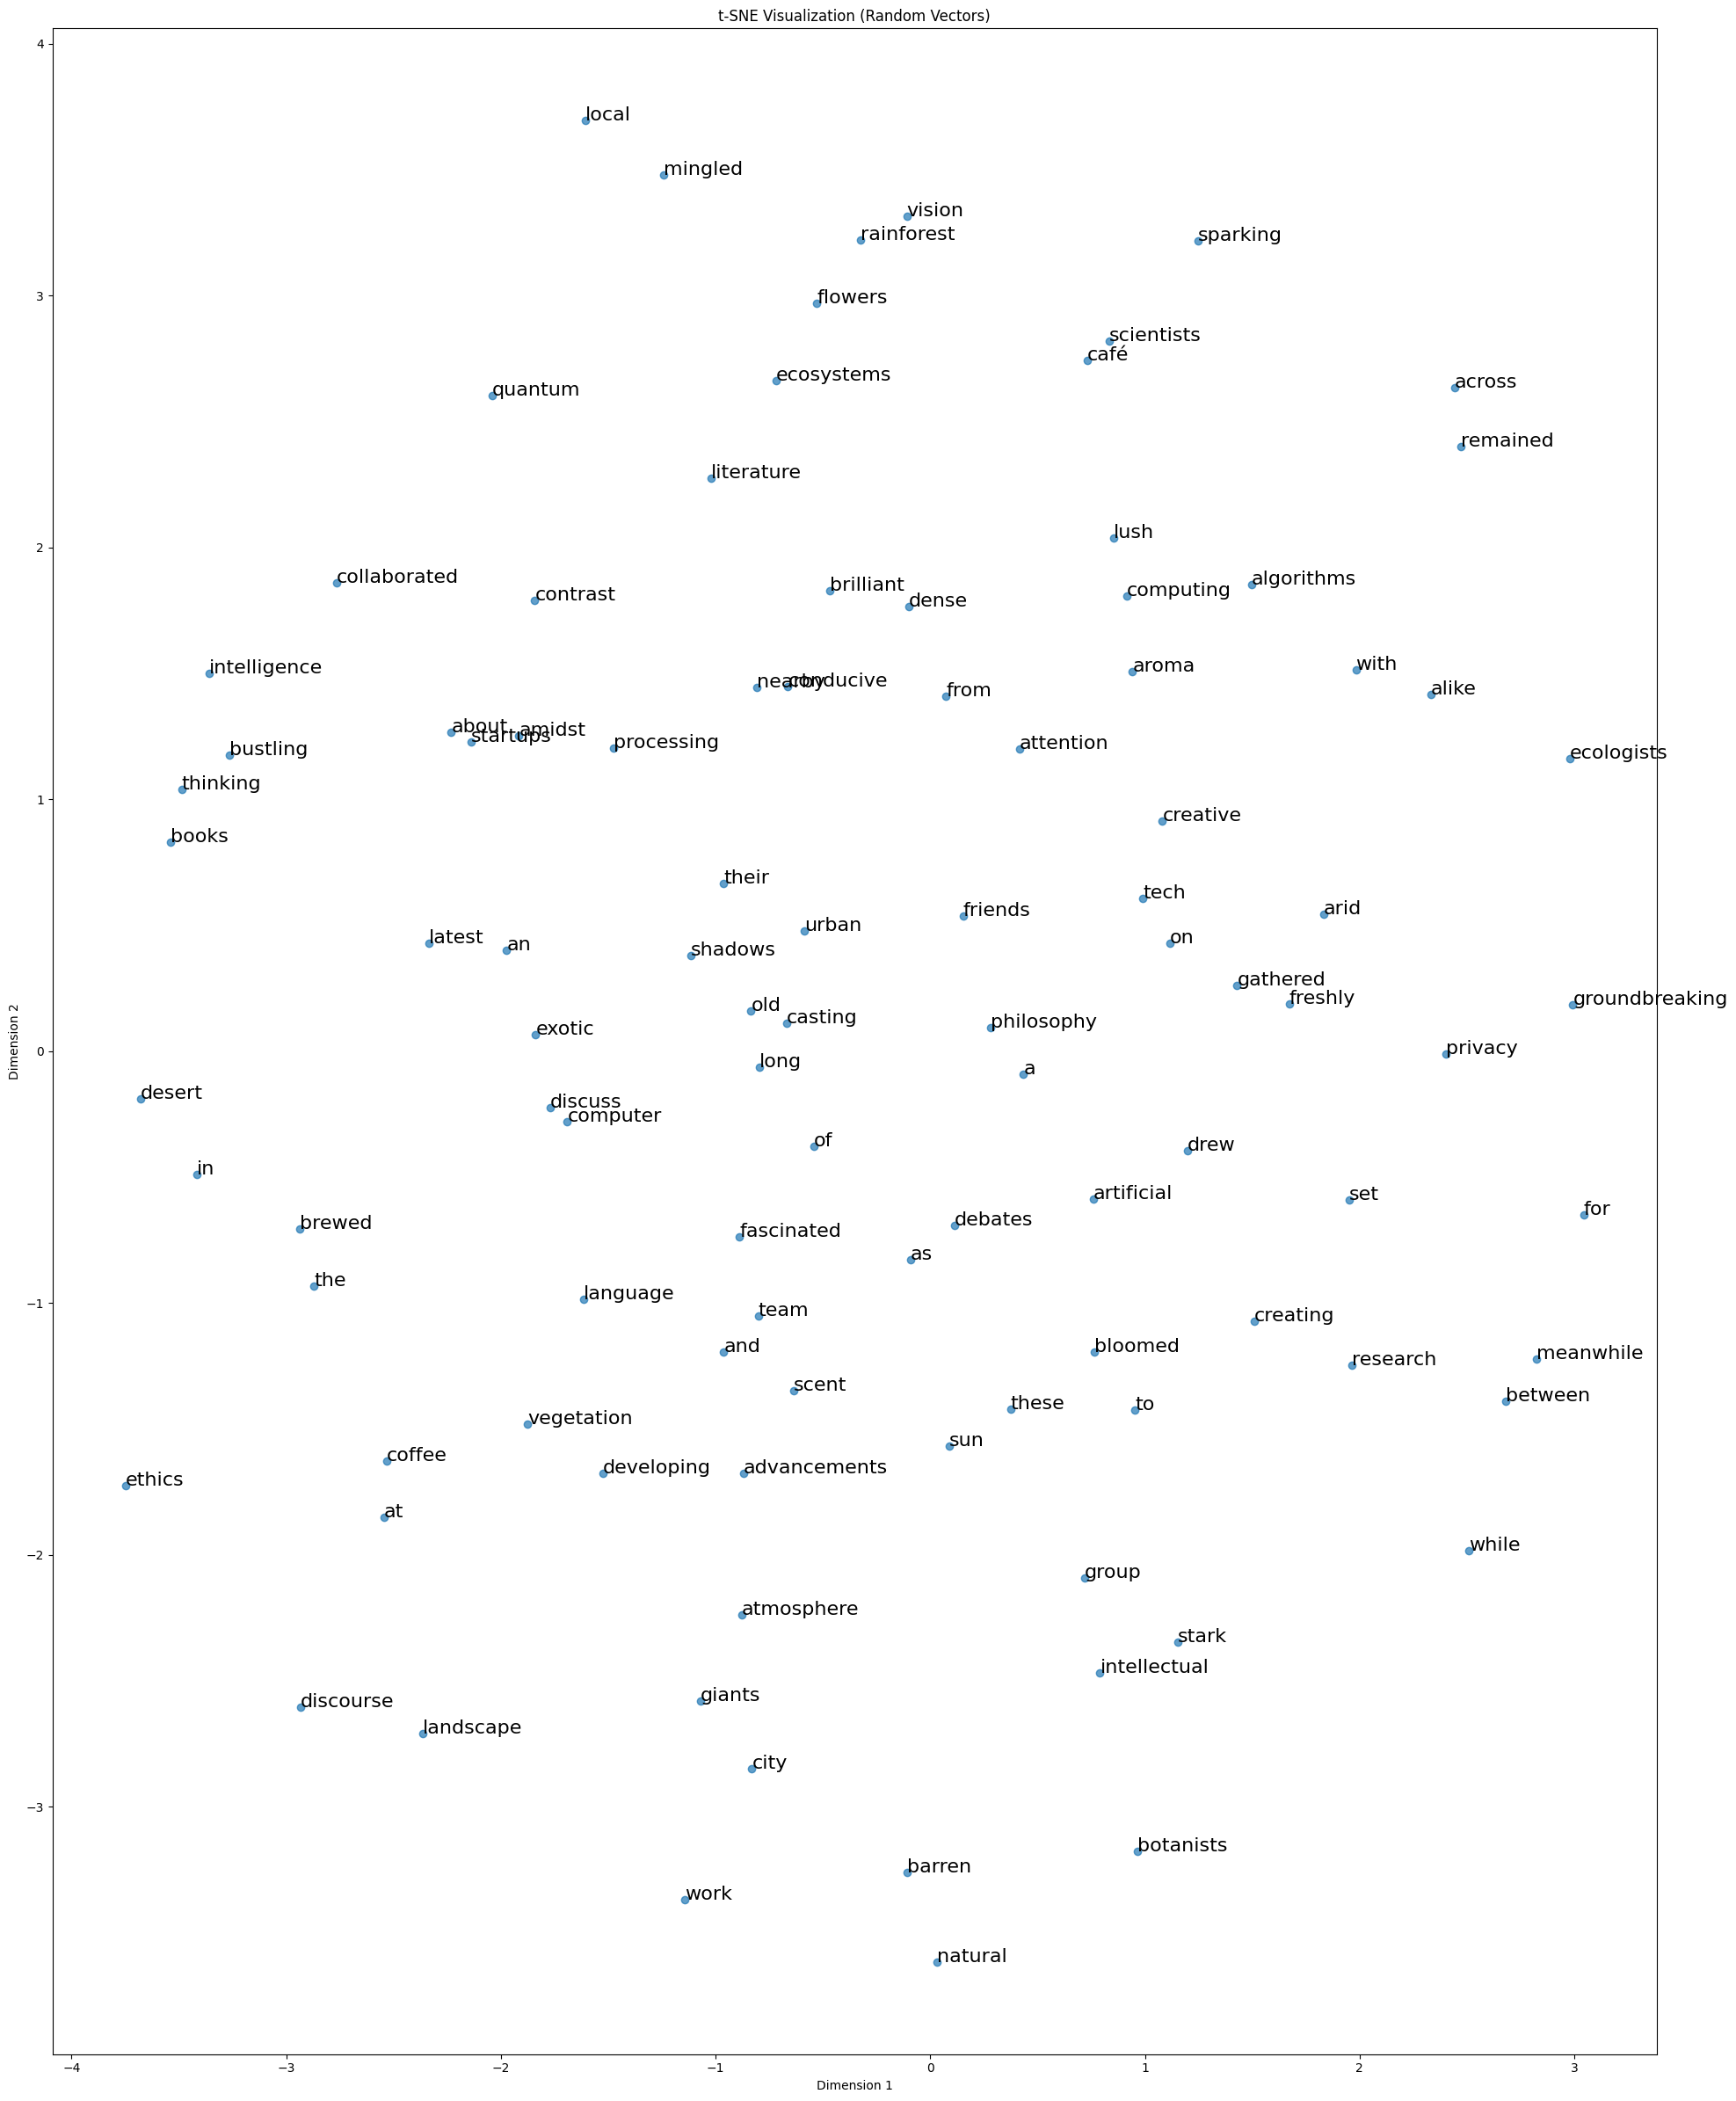

Cumulative explained variance ratio: 0.7414


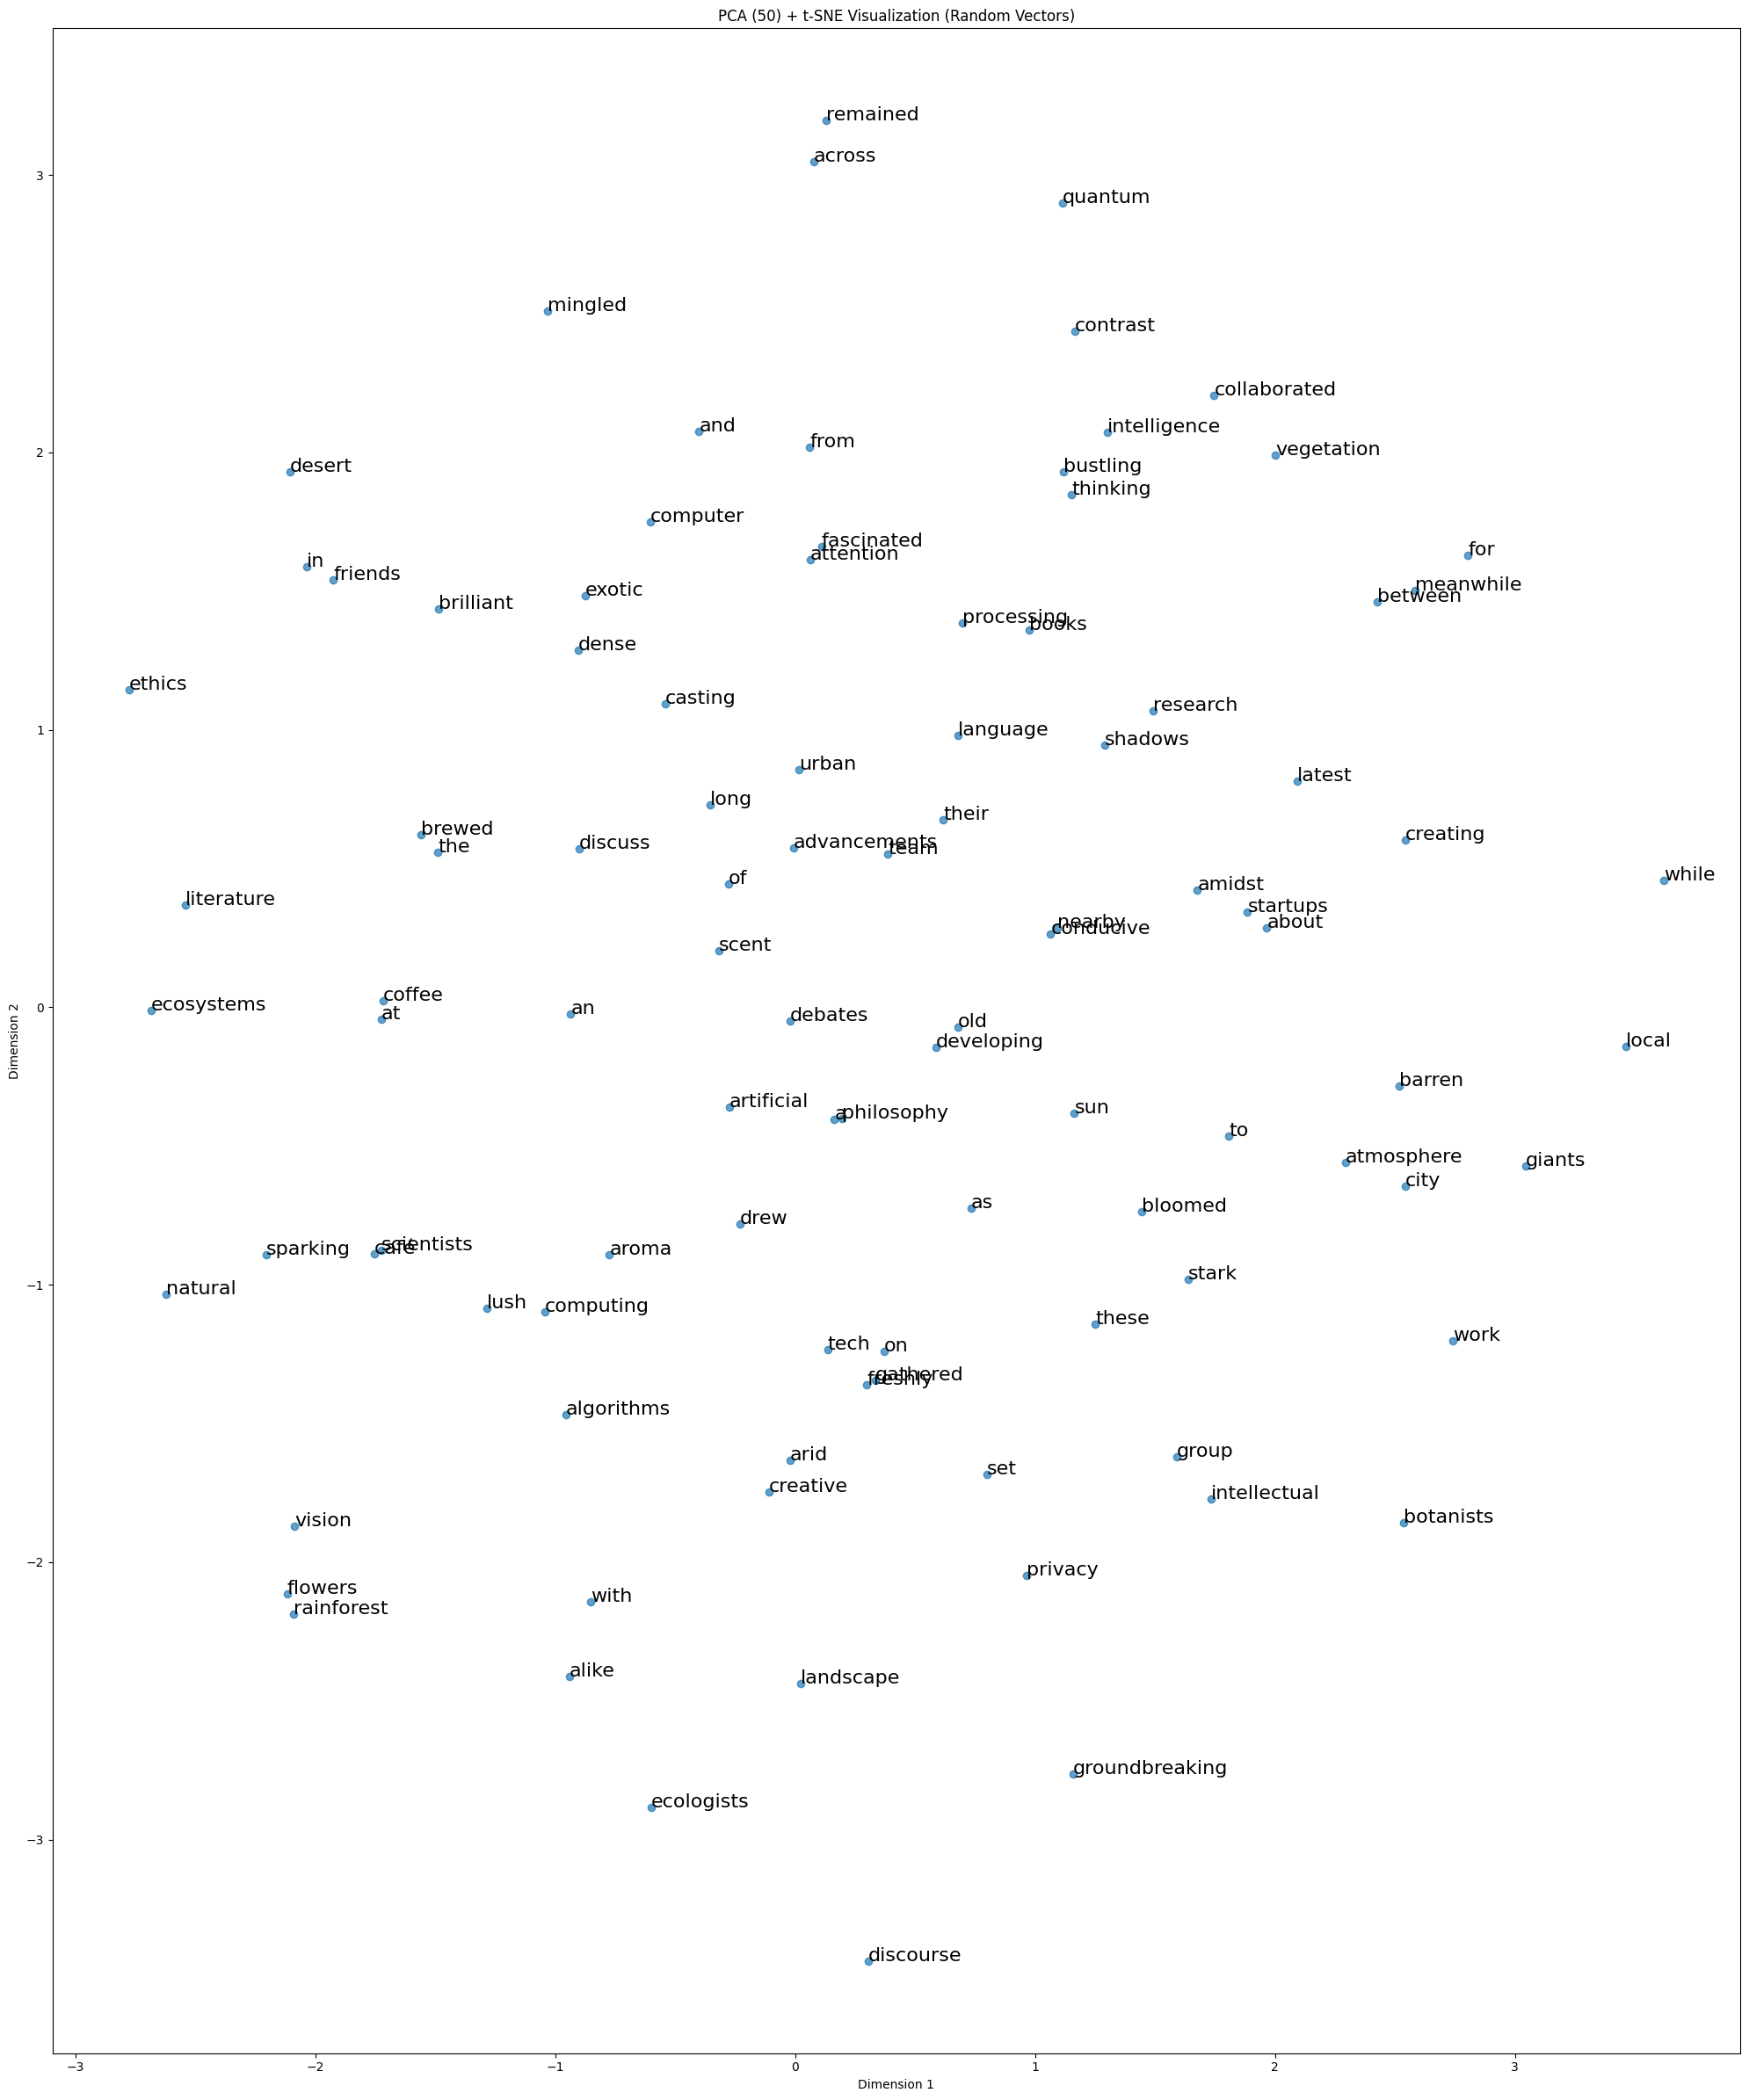

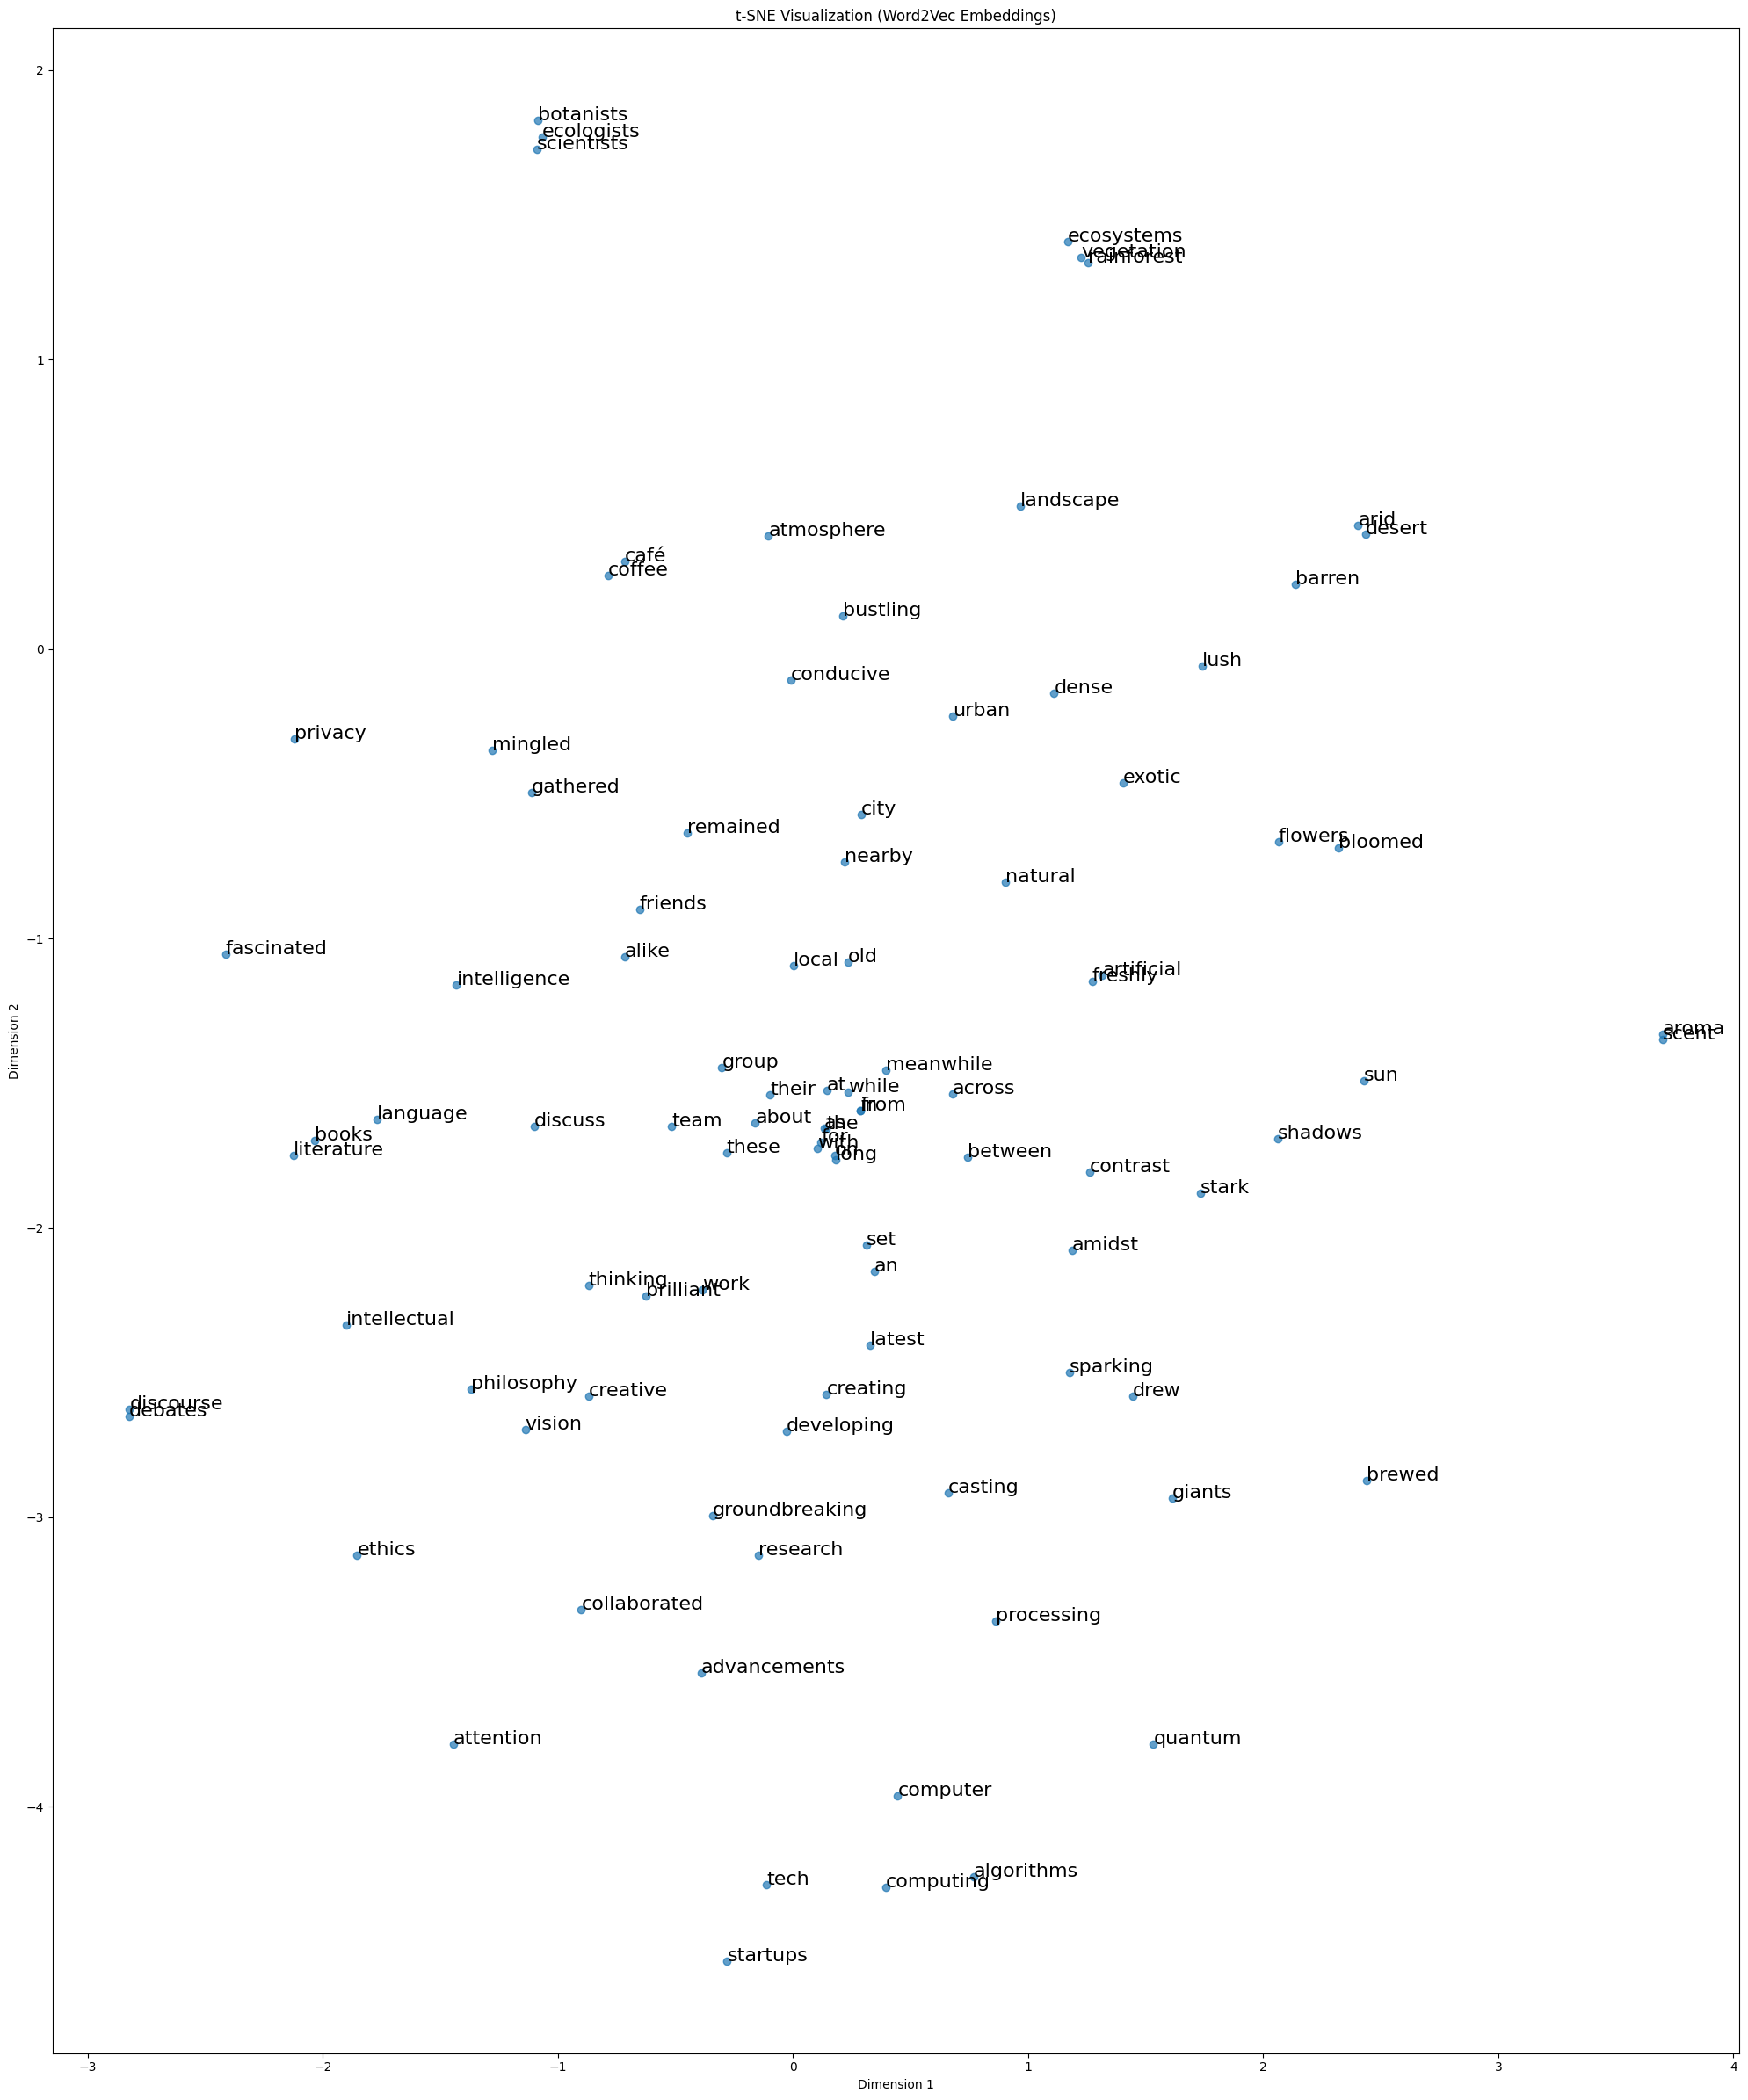

Cumulative explained variance ratio: 0.8555


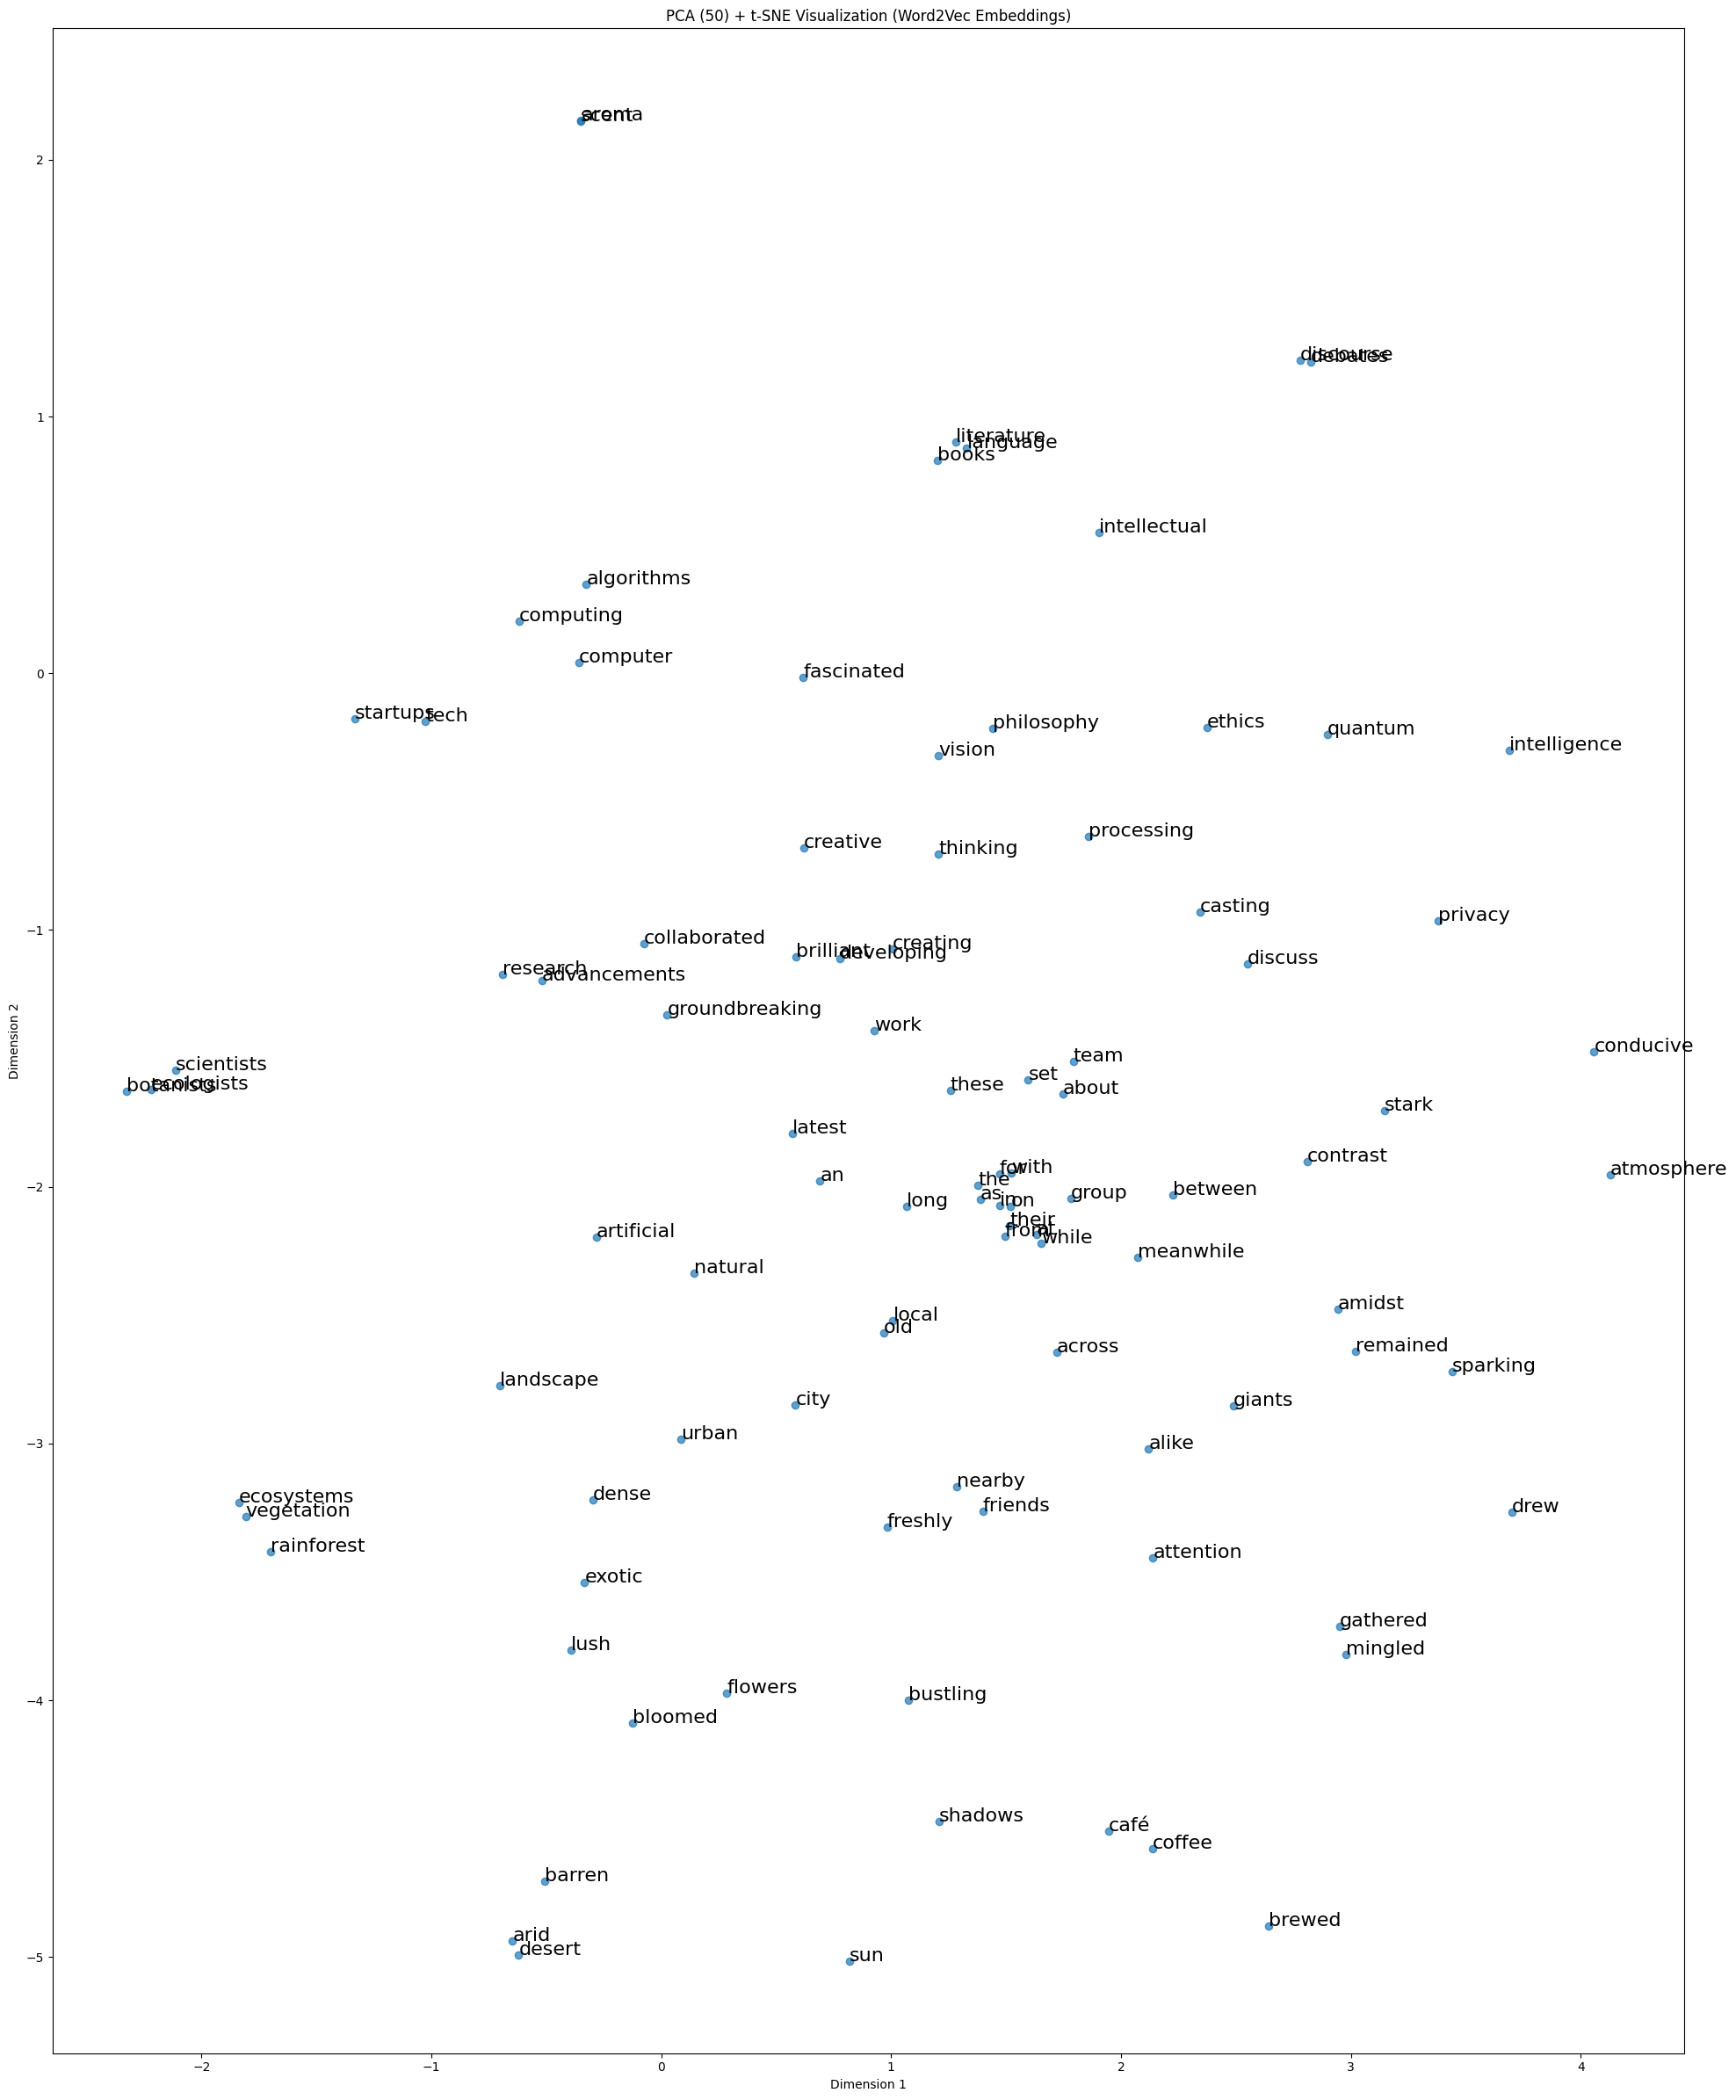

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

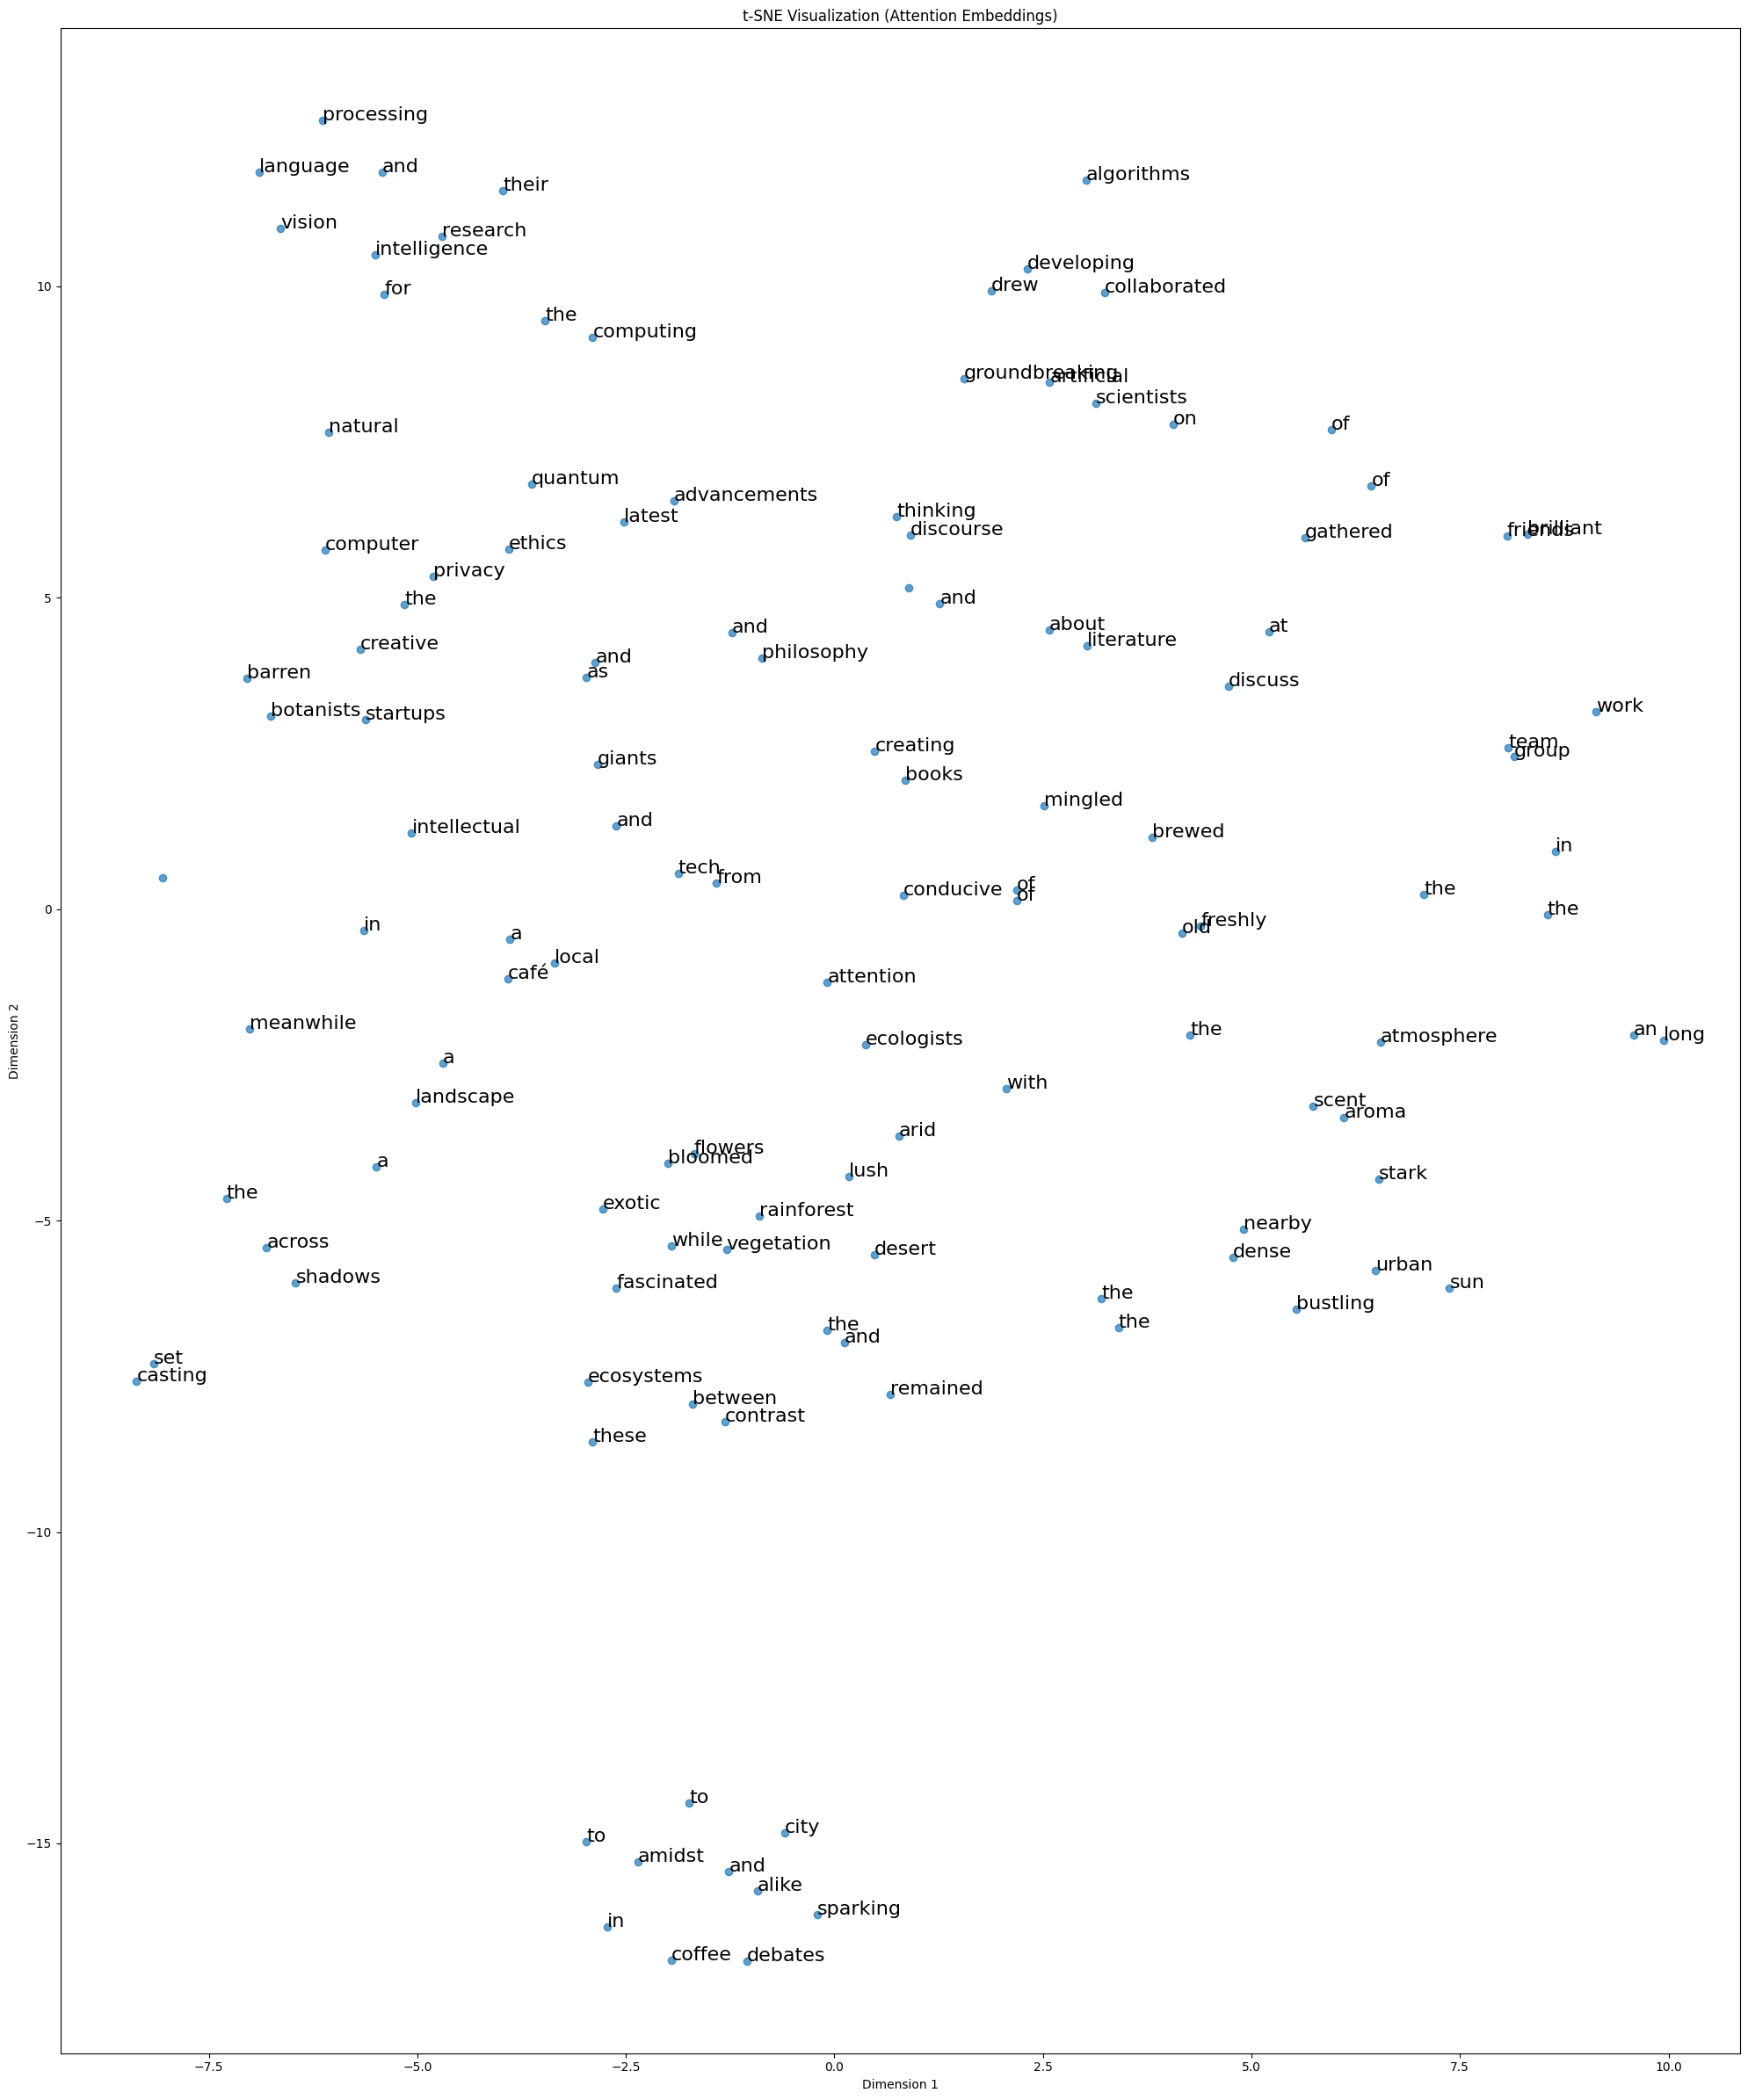

Cumulative explained variance ratio: 0.8465


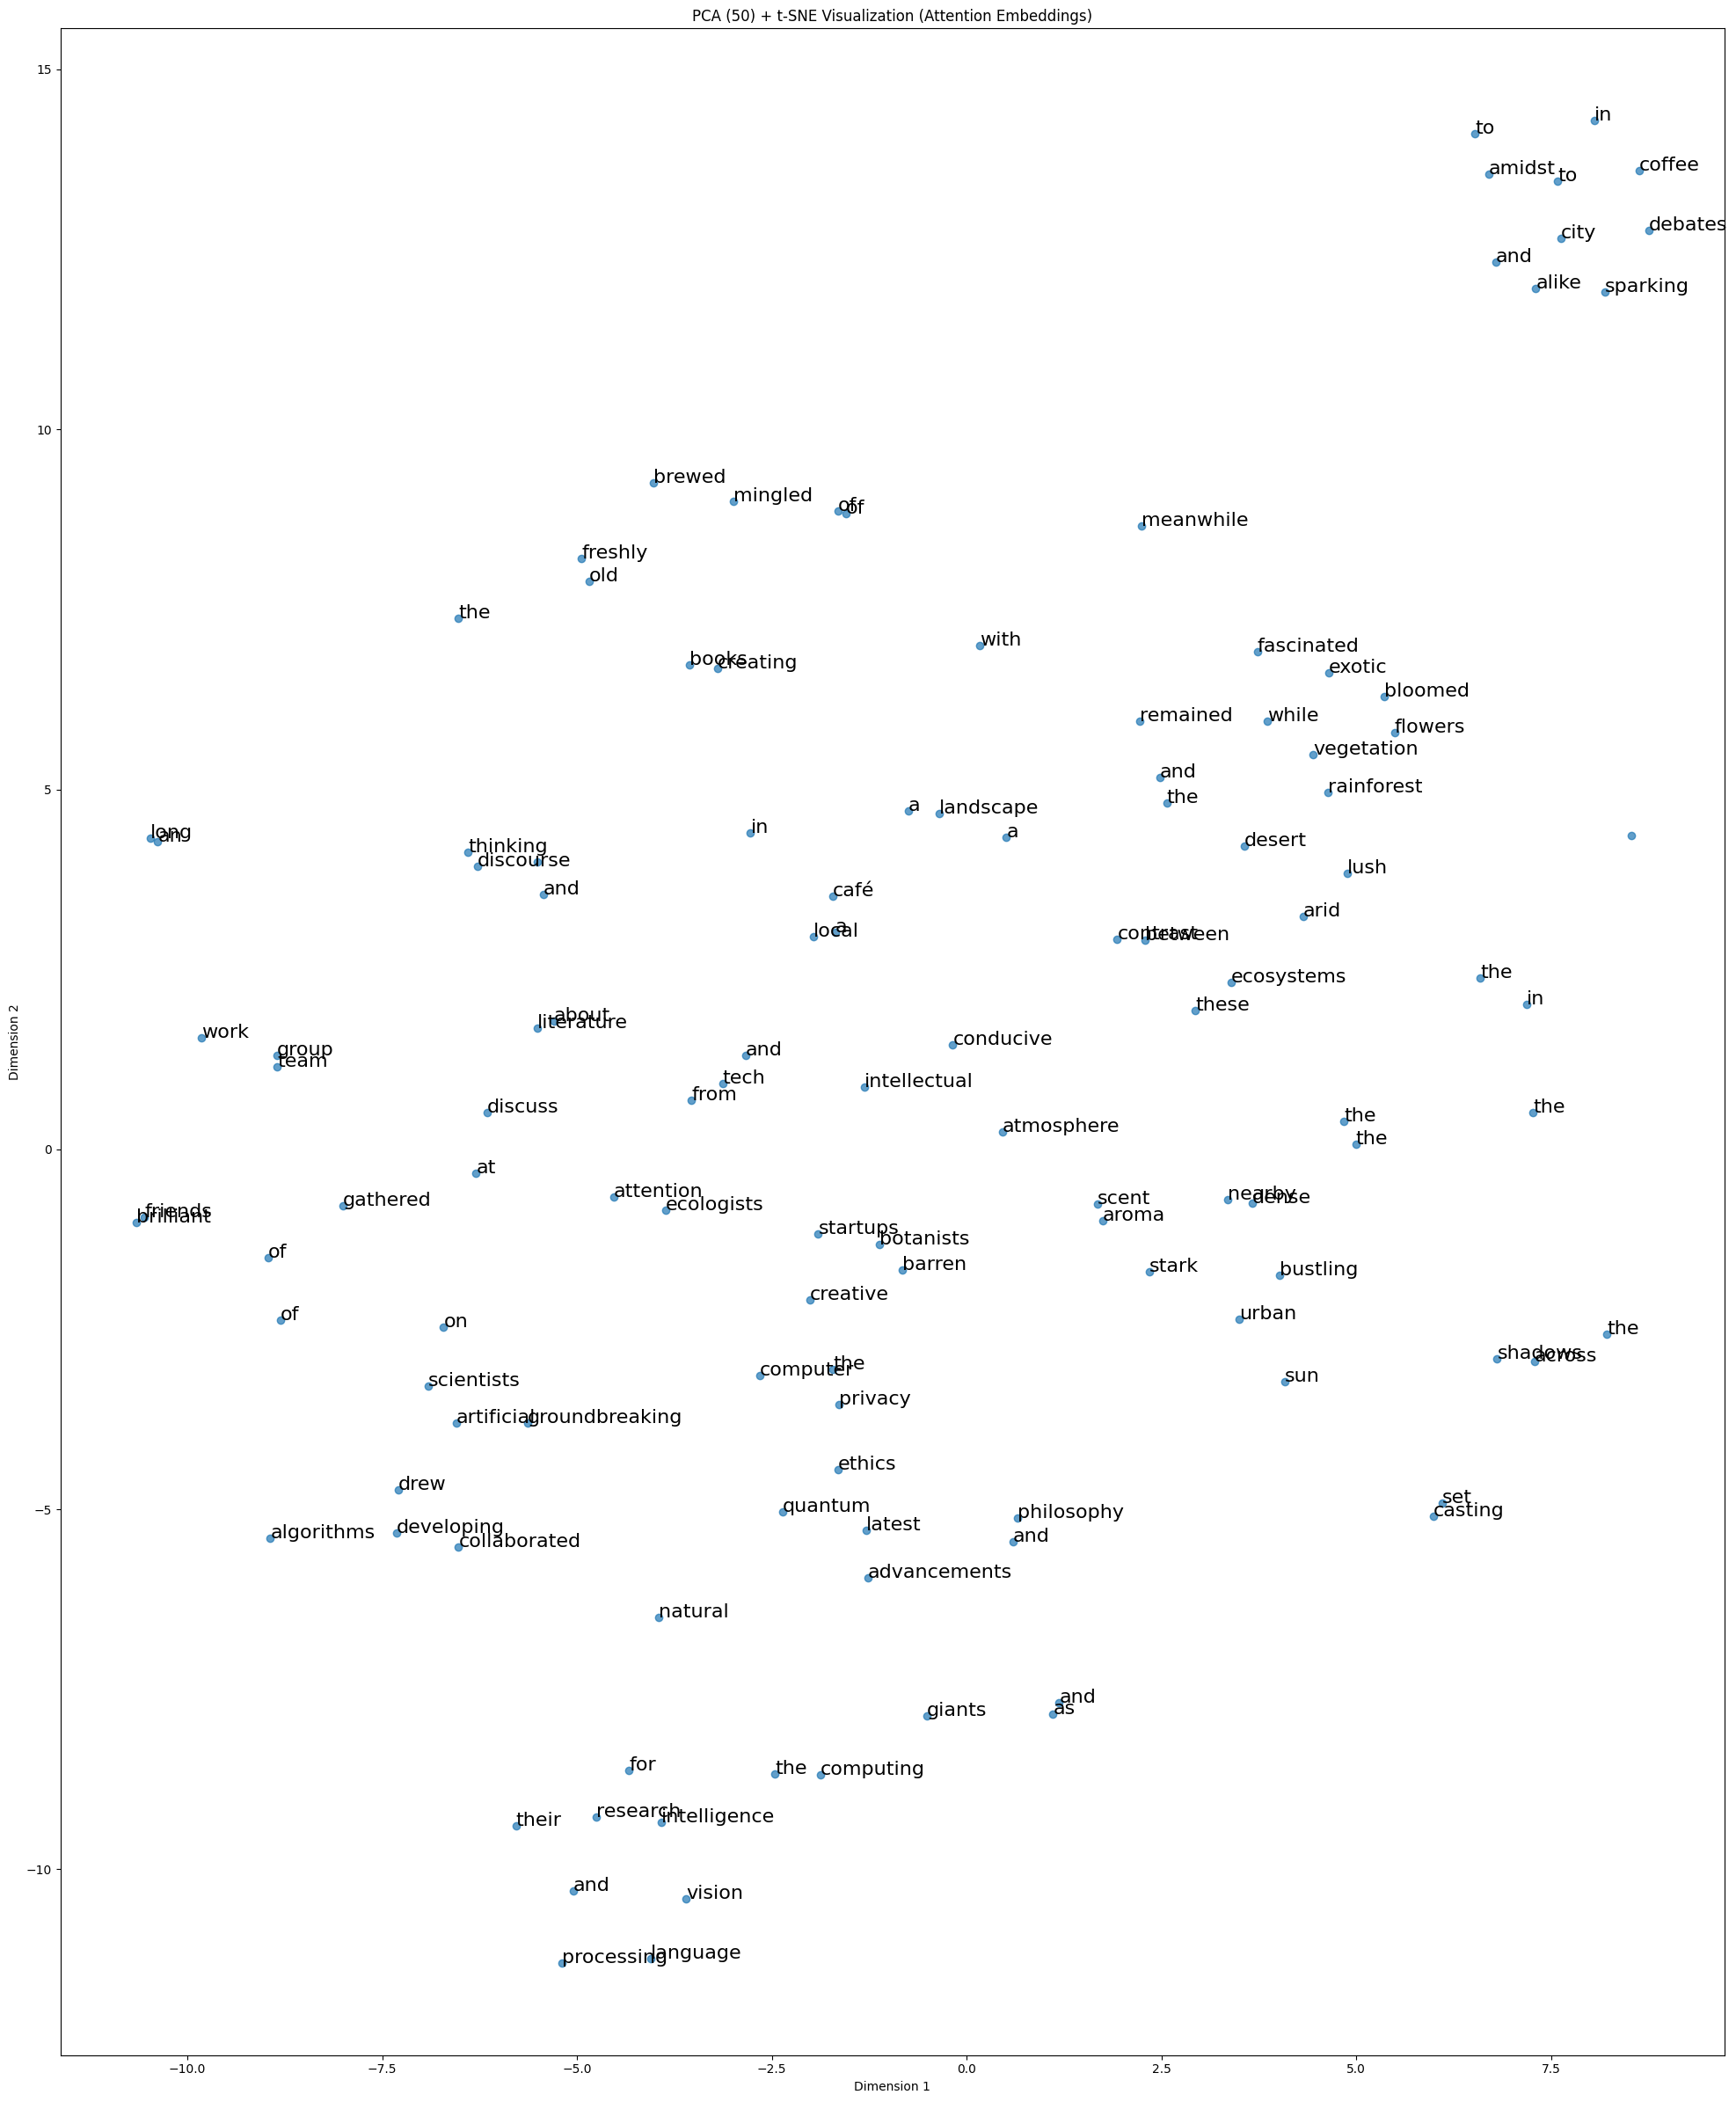

Cumulative explained variance ratio: 0.8468


In [11]:
def main():

    text = """In the dense rainforest, exotic flowers bloomed amidst lush 
    vegetation, while the nearby desert remained arid and barren. The 
    stark contrast between these ecosystems fascinated ecologists and 
    botanists alike. Meanwhile, in the bustling city, a team of brilliant 
    scientists collaborated on groundbreaking artificial intelligence research,
    developing algorithms for natural language processing and computer vision. 
    Their work drew attention from tech giants and startups, sparking debates 
    about ethics and privacy. As the sun set, casting long shadows across the 
    urban landscape, a group of friends gathered at a local café to discuss 
    literature, philosophy, and the latest advancements in quantum computing. 
    The aroma of freshly brewed coffee mingled with the scent of old books, 
    creating an atmosphere conducive to intellectual discourse and creative 
    thinking."""
    
    words = re.findall(r'\w+', text.lower())

    # Random Embeddings
    random_vectors, words_list = get_random_embeddings(words)
    visualize_embeddings(random_vectors, words_list, 'Random Vectors')
    visualize_embeddings_again(random_vectors, words_list, 'Random Vectors')
    visualize_embeddings_pca(random_vectors, words_list, 'Random Vectors')
    
    print("\n\n\n\n\n")

    # Word2Vec Embeddings
    w2v_vectors, words_list = get_w2v_embeddings(words, w2v)
    visualize_embeddings(w2v_vectors, words_list, 'Word2Vec Embeddings')
    visualize_embeddings_again(w2v_vectors, words_list, 'Word2Vec Embeddings')
    visualize_embeddings_tsne(w2v_vectors, words_list, 'Word2Vec Embeddings')
    
    print("\n\n\n\n\n")

    # Attention Embeddings
    attention_embeddings = get_attention_embeddings(words)
    visualize_embeddings(attention_embeddings, words, 'Attention Embeddings')
    visualize_embeddings_again(attention_embeddings, words, 'Attention Embeddings')
    visualize_embeddings_pca_tsne(attention_embeddings, words, 'Attention Embeddings')

if __name__ == "__main__":
    main()